## Deconvolve microtubules phantom

In this example we use clij2fft non-circulant richardson lucy to deconvolve the microtubules phantom from here http://bigwww.epfl.ch/deconvolution/data/microtubules/

In [1]:
import matplotlib.pyplot as plt
from skimage.io import imread
from tnia.plotting.projections import show_xyz_max
import numpy as np

## Define image locatons and read images

In [6]:
dir_name='D:\\images\\'
#dir_name='/home/bnorthan/Images/'

dir_name='D:\\images\\'
#dir_name='/home/bnorthan/Images/'

im_name = dir_name+'tnia-python-images/deconvolution/microtubules/input.tif'
psf_name = dir_name+'tnia-python-images/deconvolution/microtubules/psf.tif'
truth_name = dir_name+'tnia-python-images/deconvolution/microtubules/ground-truth.tif'

im_name

'D:\\images\\tnia-python-images/deconvolution/microtubules/input.tif'

In [7]:
im=imread(im_name)
psf=imread(psf_name)
truth=imread(truth_name)
print(im.shape, psf.shape)

(128, 256, 512) (128, 256, 512)


## Crop along z 

Since we want to test the benefit of non-circulant deconvolution crop in z direction so the extended object is truncated.  Non-circulant deconvolution should have benefits under these conditions

Text(0.5, 0.98, 'Cropped Truth')

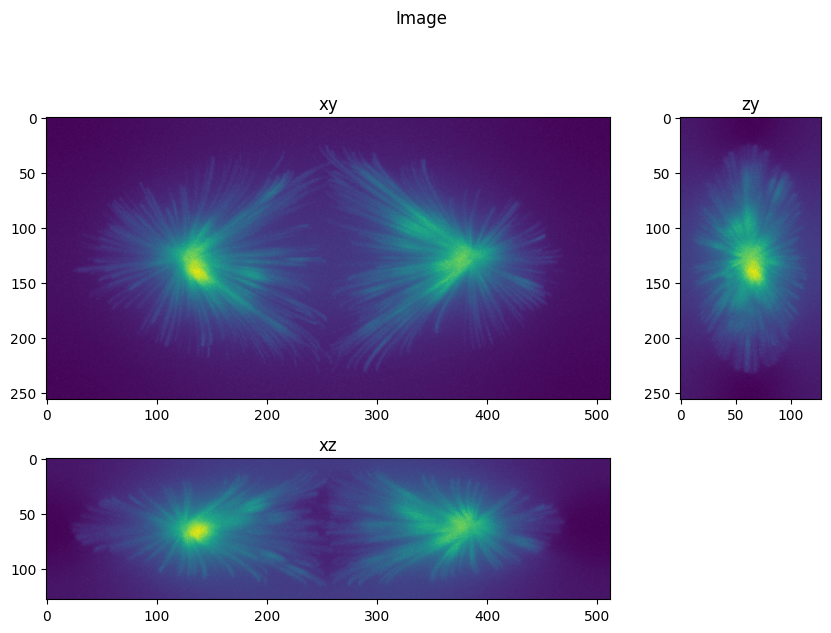

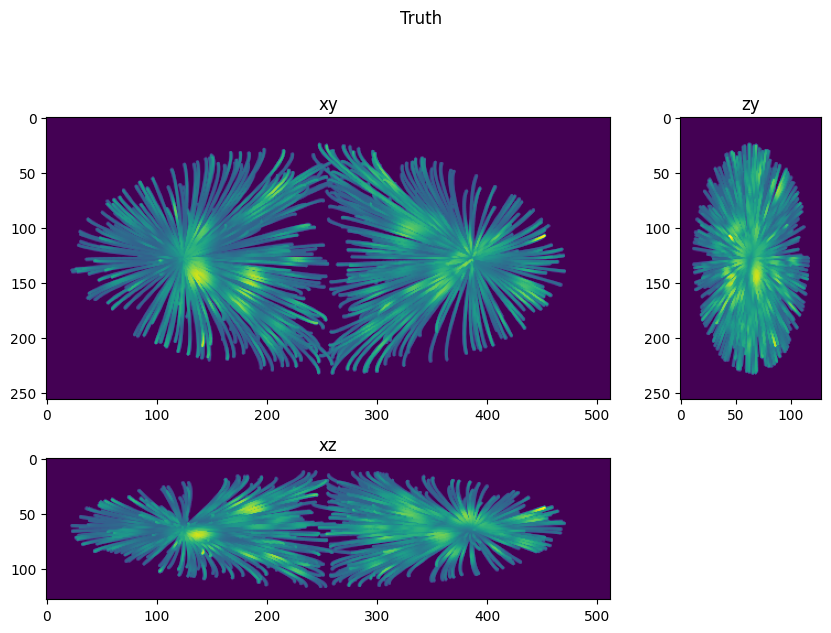

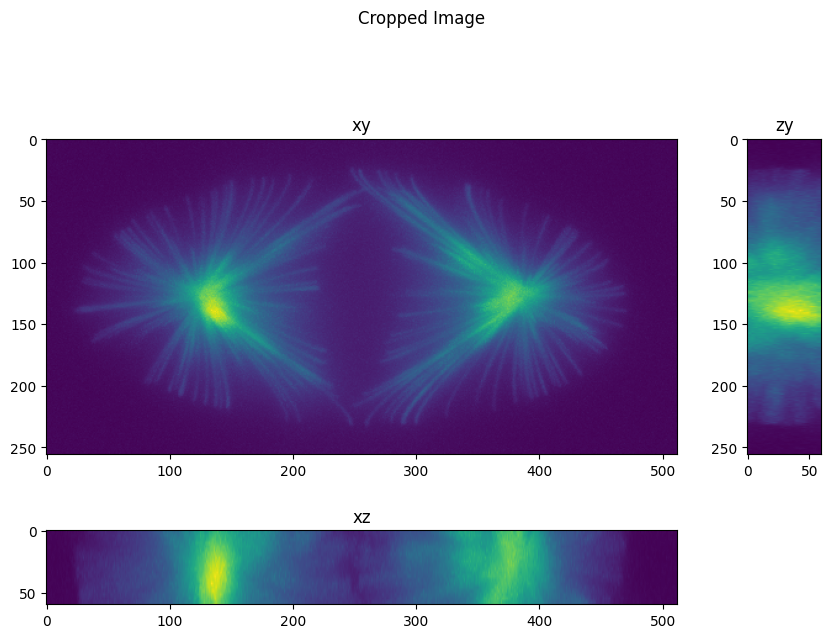

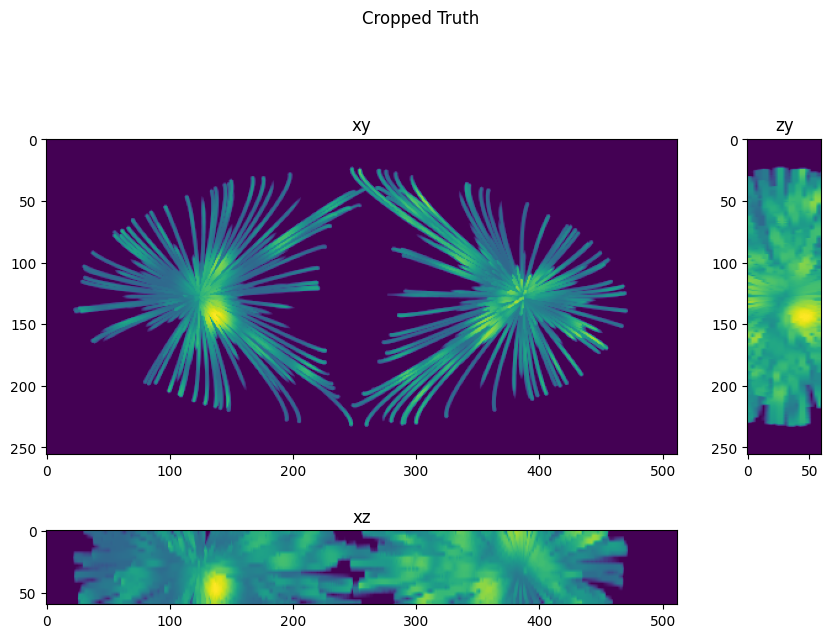

In [8]:
fig=show_xyz_max(im,figsize=(10,7))
fig.suptitle('Image')
fig=show_xyz_max(truth,figsize=(10,7))
fig.suptitle('Truth')
ind = np.s_[54:74, :, :]
im=im[ind]
truth=truth[ind]
fig=show_xyz_max(im,1,3,figsize=(10,7))
fig.suptitle('Cropped Image')
fig=show_xyz_max(truth,1,3,figsize=(10,7))
fig.suptitle('Cropped Truth')

## Crop PSF to make decon a bit faster 

In [9]:
from tnia.nd.ndutil import centercrop
psf=centercrop(psf, (128,128,128))
psf.shape

(128, 128, 128)

## Perform deconvolution with clij2-fft non-circulant algorithm

In [10]:
from clij2fft.richardson_lucy import richardson_lucy, richardson_lucy_nc
decon_nc=richardson_lucy_nc(im, psf, 400, 0.0005)

get lib


## Perform deconvolution with Red Lion Fish standard RL implementation

In [11]:
import RedLionfishDeconv as rl
decon_rlf=rl.doRLDeconvolutionFromNpArrays(im, psf, niter=400, method='gpu', resAsUint8=False )

In [12]:
from tnia.metrics.errors import RMSE

print(RMSE(truth,truth))
print(RMSE(truth,im))
print(RMSE(truth,decon_nc))
print(RMSE(truth,decon_rlf))


0.0
1018.9625
683.29236
967.20294


Text(0.5, 0.98, 'RedFish Decon')

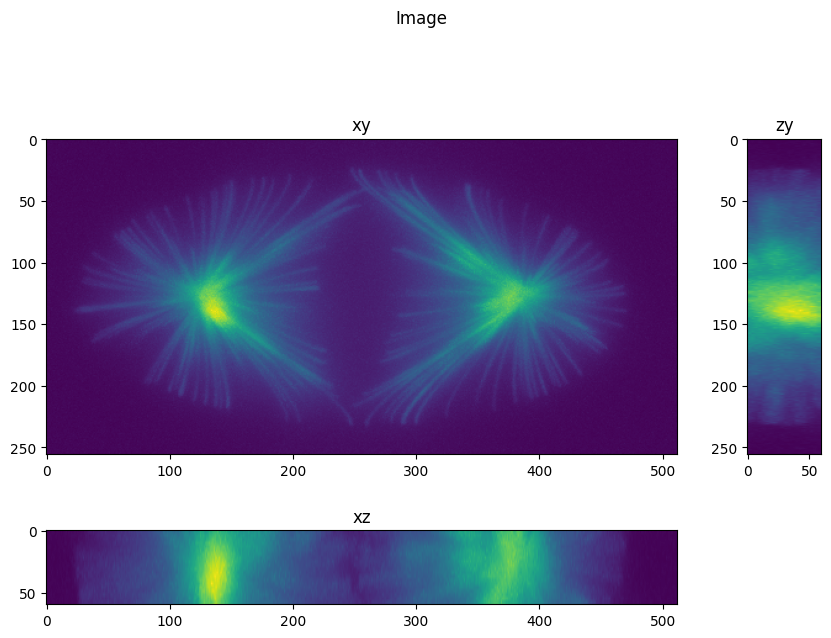

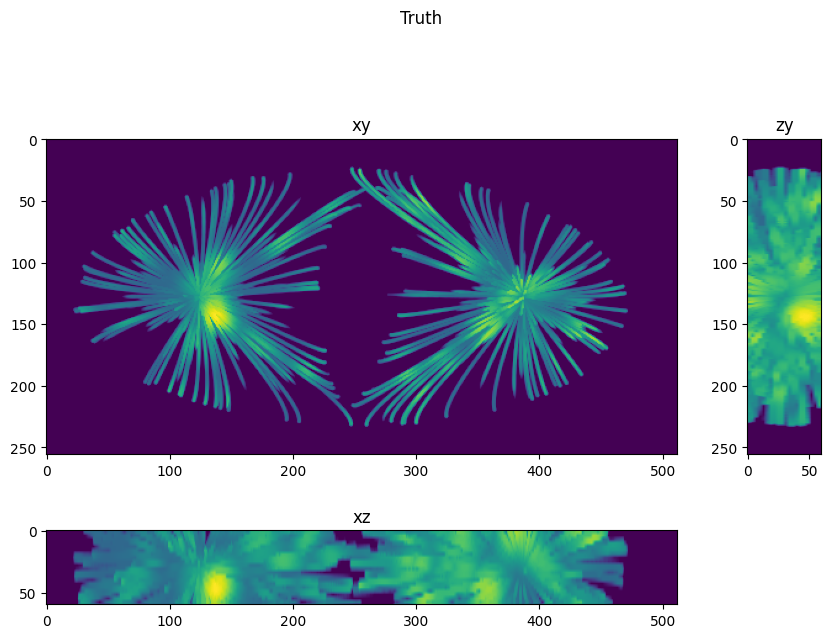

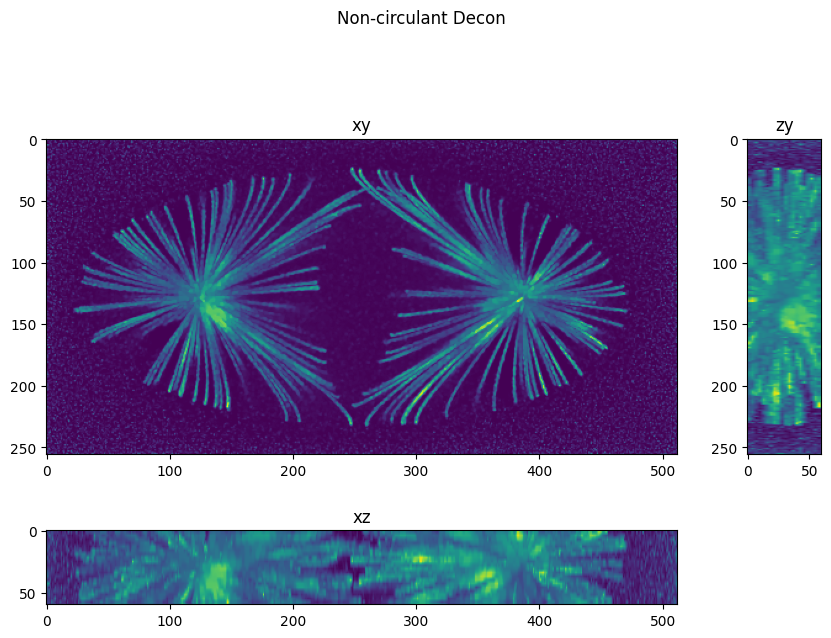

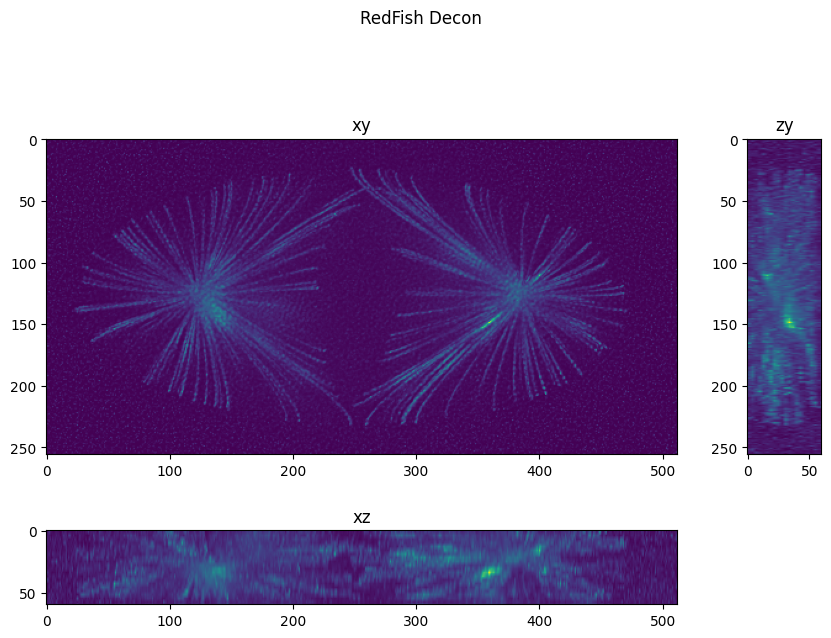

In [13]:
fig=show_xyz_max(im,1,3,figsize=(10,7))
fig.suptitle('Image')
fig=show_xyz_max(truth,1,3,figsize=(10,7))
fig.suptitle('Truth')
fig=show_xyz_max(decon_nc,1,3,figsize=(10,7))
fig.suptitle('Non-circulant Decon')
fig=show_xyz_max(decon_rlf,1,3,figsize=(10,7))
fig.suptitle('RedFish Decon')

In [14]:
import napari
viewer=napari.Viewer()
viewer.add_image(im, scale=(3,1,1))
viewer.add_image(decon_rlf, scale=(3,1,1))
viewer.add_image(decon_nc, scale=(3,1,1))
#viewer.add_image(decon_rlf, scale=(3,1,1))
viewer.add_image(truth, scale=(3,1,1))

<Image layer 'truth' at 0x1a58917a6d0>